## Make plots for all materials
### Author: Henry Nachman
#### Last Updated: 2024-06-13


First, we will import the necessary packages...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.integrate import quad
import sys, os
from fit_types import *
from tc_tools  import *


# Get the absolute path of the current script
abspath = os.path.abspath("material_plots.ipynb")
print(os.path.split(abspath))
path_to_tcFiles = f"{os.path.split(abspath)[0]}{os.sep}.."

['tc_fullrepo_20240620.csv', 'tc_fullrepo_20240620.txt']
('c:\\Users\\henac\\OneDrive - The University of Texas at Austin\\01_RESEARCH\\05_CMBS4\\Cryogenic_Material_Properties\\thermal_conductivity', 'material_plots.ipynb')


In [2]:
all_files = os.listdir(path_to_tcFiles)
exist_files = [file for file in all_files if file.startswith("tc_fullrepo")]
print(exist_files)
tc_file_date = exist_files[0][-12:-4]

TCdata = np.loadtxt(f"{path_to_tcFiles}{os.sep}tc_fullrepo_{tc_file_date}.csv", dtype=str, delimiter=',') # imports compilation file csv
mat_names = TCdata[:,0]

['tc_fullrepo_20240620.csv', 'tc_fullrepo_20240620.txt']


Aluminum_1100 Nppoly


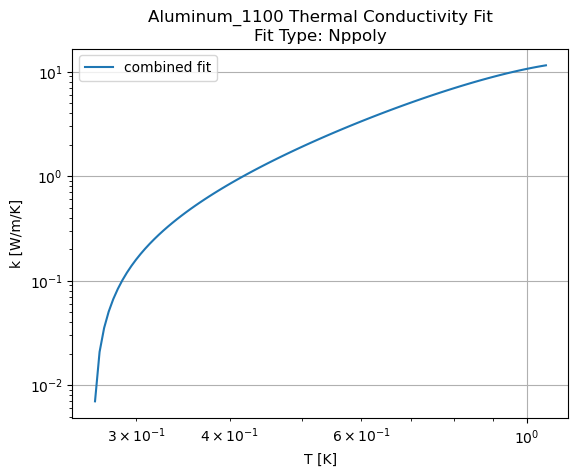

Aluminum_3003F polylog


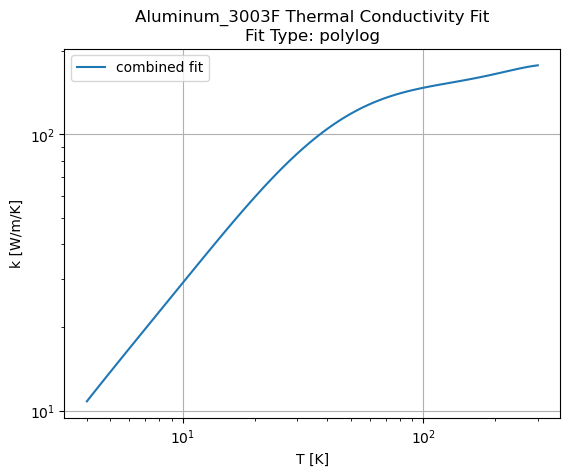

Aluminum_5083O polylog


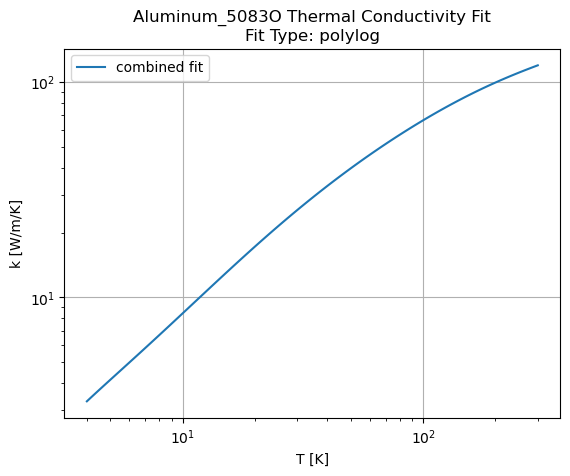

Aluminum_6061T6 polylog


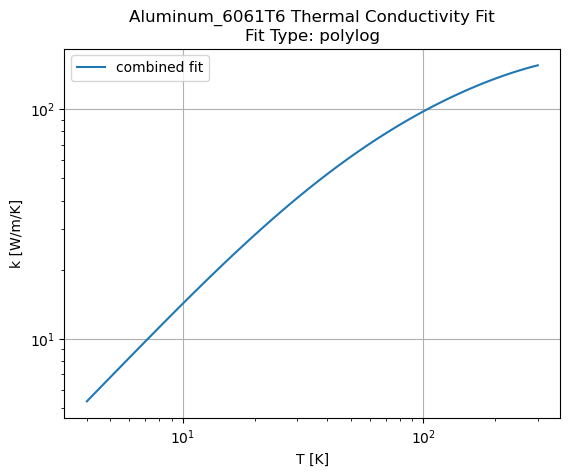

Aluminum_6063T5 polylog


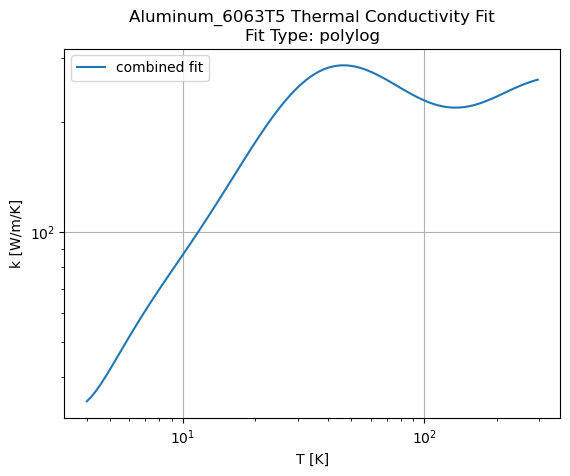

Beryllium_Copper polylog


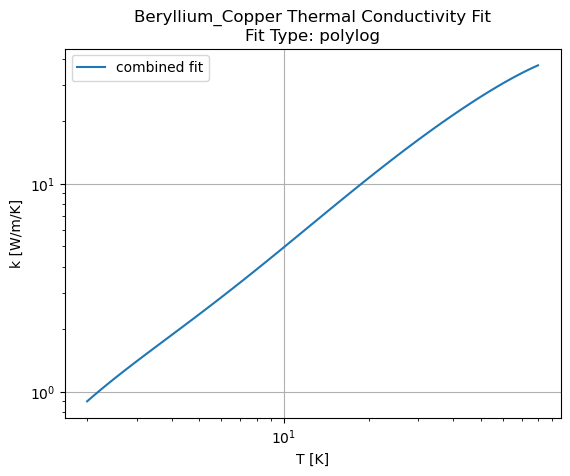

Brass polylog


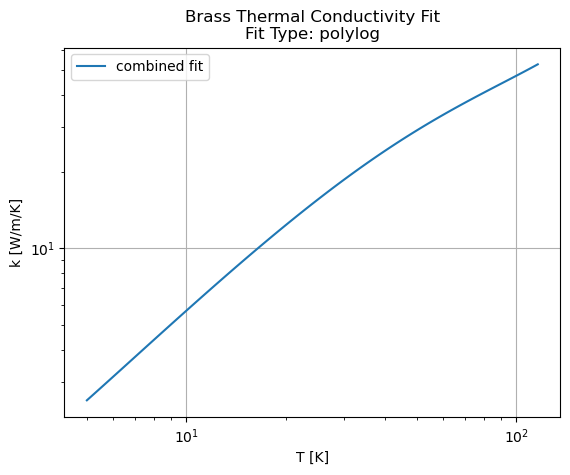

CFRP Nppoly


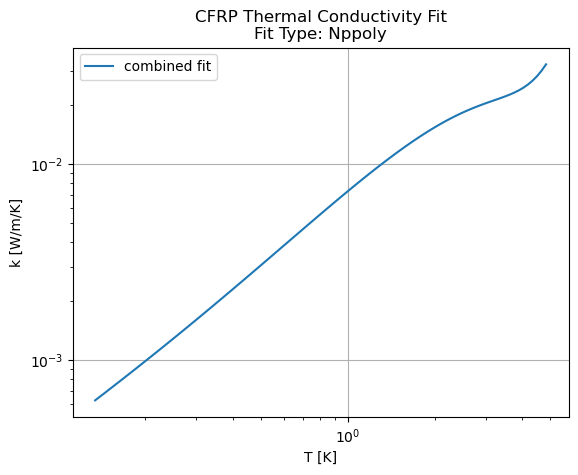

CFRP_Clearwater Nppoly


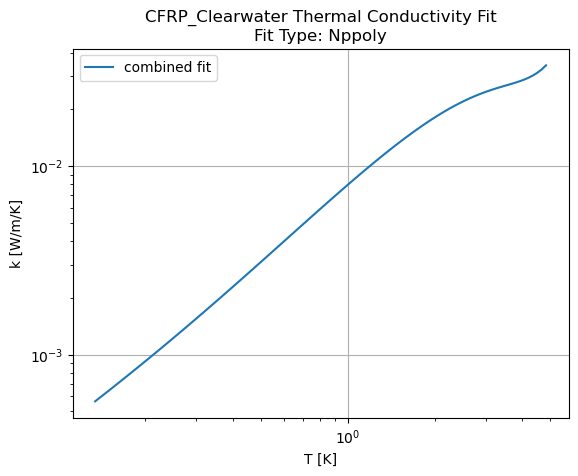

CFRP_DPP Nppoly


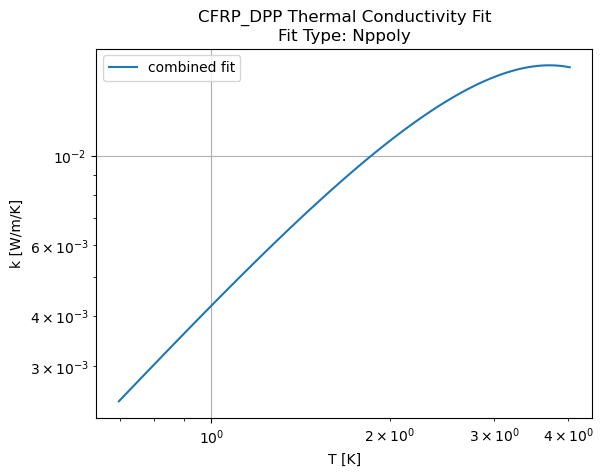

CFRP_Graphlite Nppoly


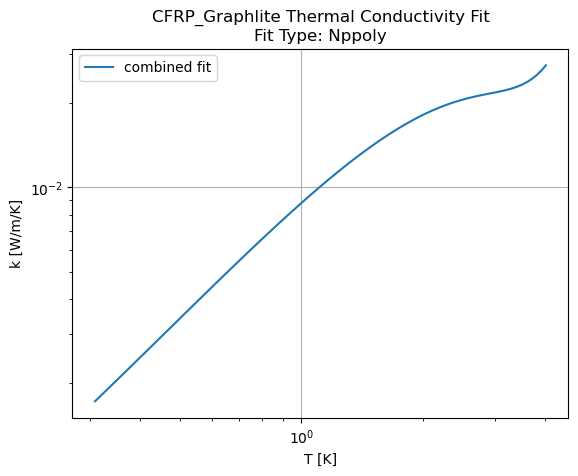

Constantan TchebyLnT


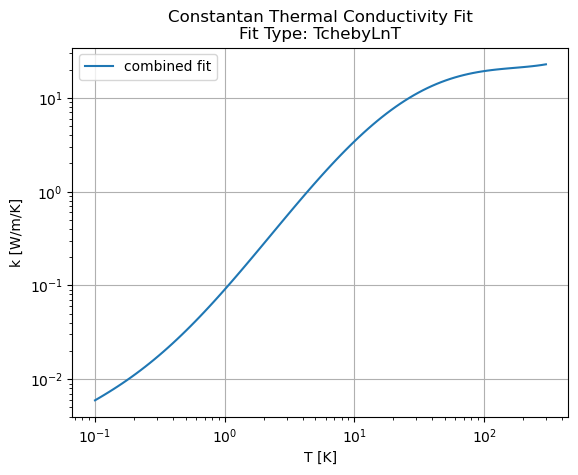

Cu_OFHC_RRR100 NIST-copperfit


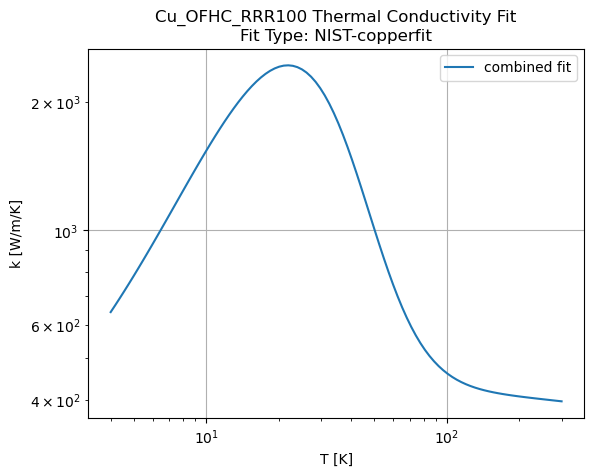

Cu_OFHC_RRR150 NIST-copperfit


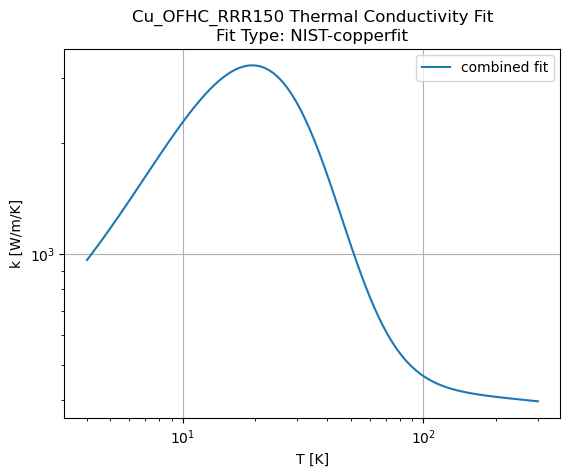

Cu_OFHC_RRR300 NIST-copperfit


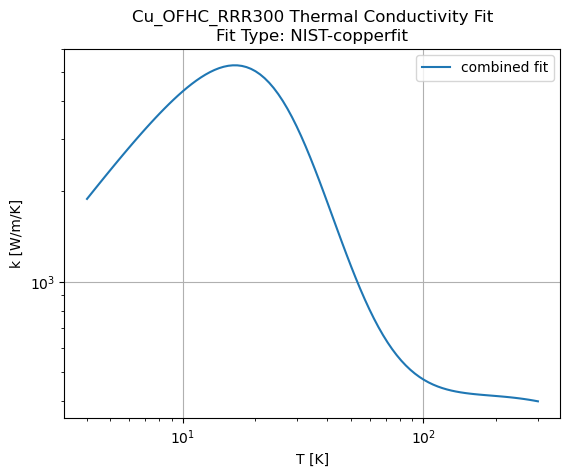

Cu_OFHC_RRR50 NIST-copperfit


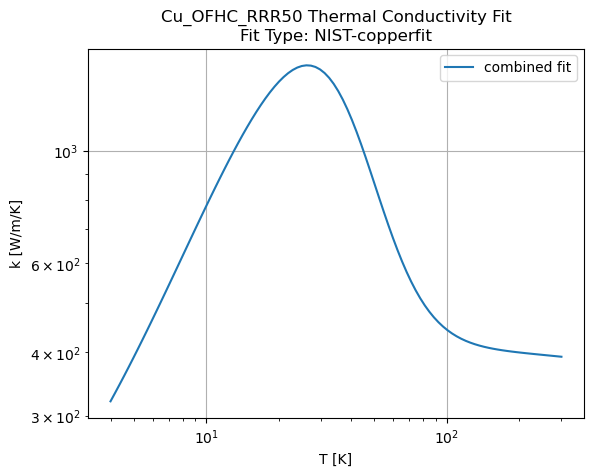

Cu_OFHC_RRR500 NIST-copperfit


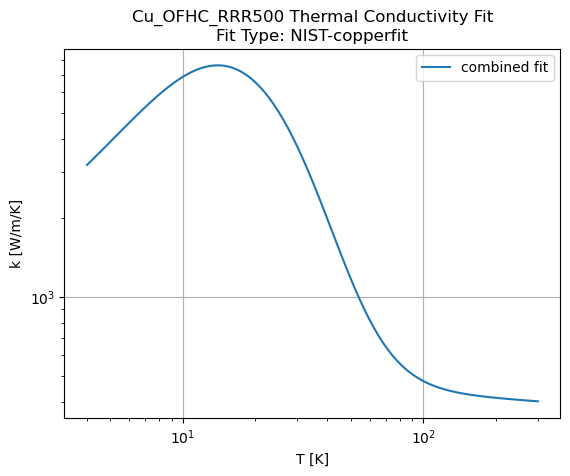

G10_CR_Normal polylog


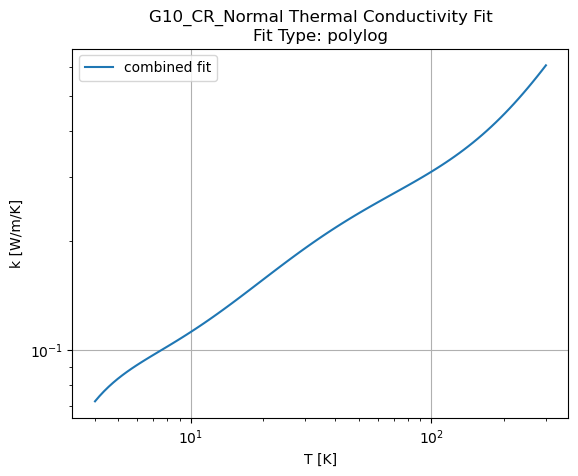

G10_CR_Warp polylog


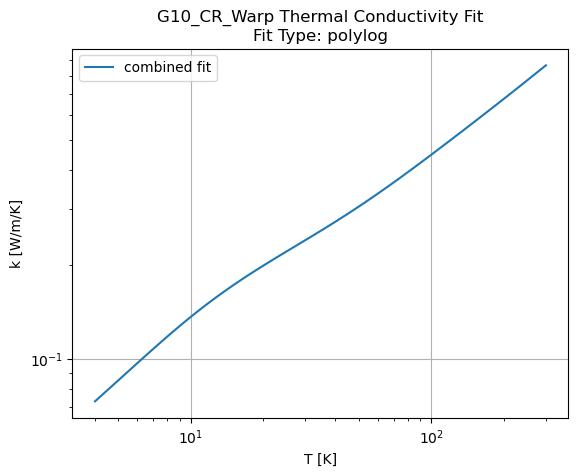

G10_FR4 Nppoly


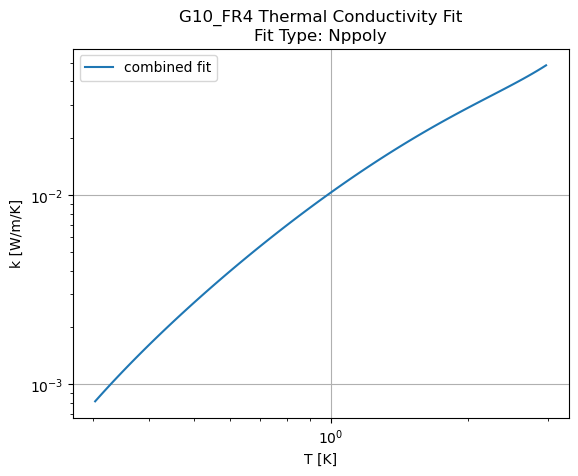

Glass_FabricPolyester_He_warp polylog


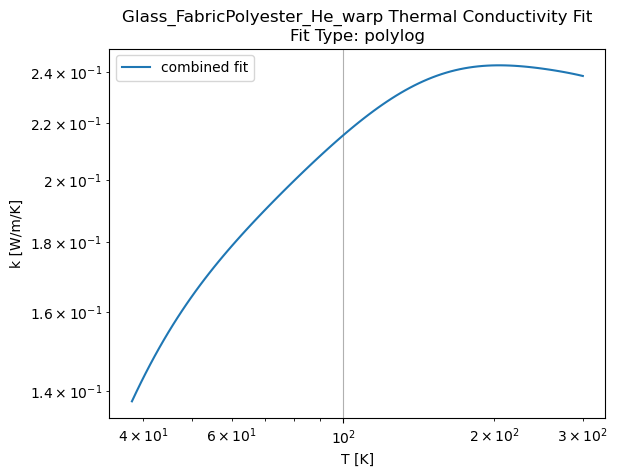

Glass_FabricPolyester_Ni_normal polylog


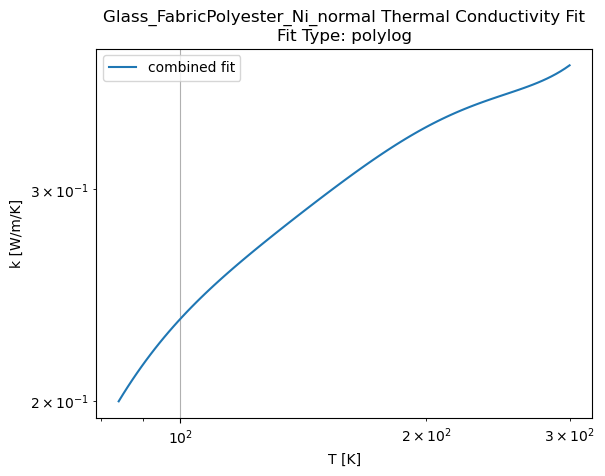

Glass_FabricPolyester_Ni_warp polylog


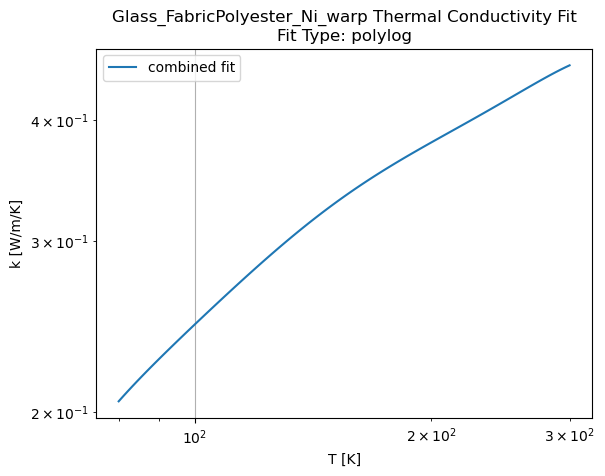

Graphite lowTextrapolate


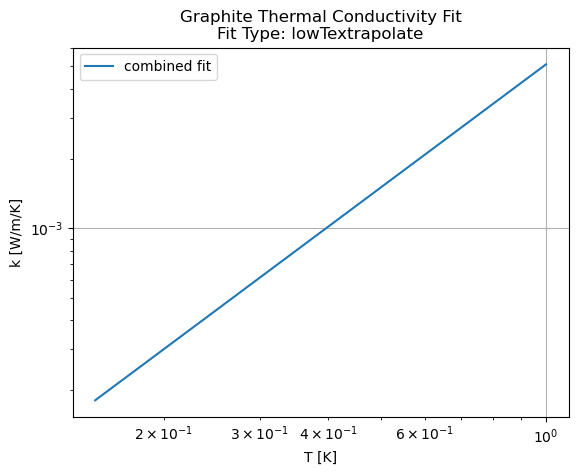

Graphite_a polylog


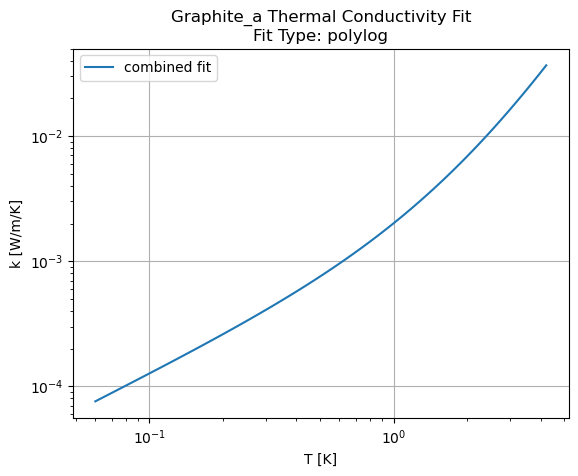

Graphite_brad lowTextrapolate


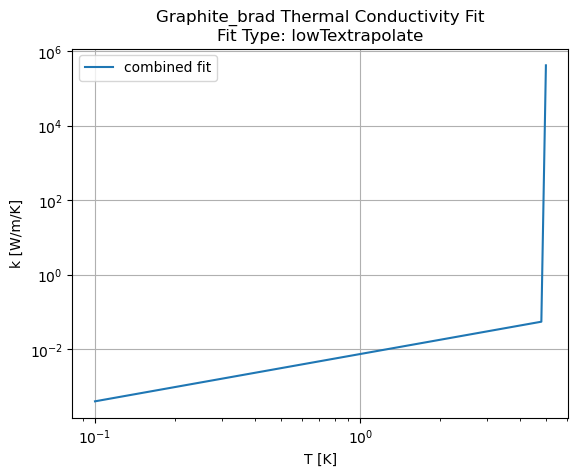

Graphite_p polylog


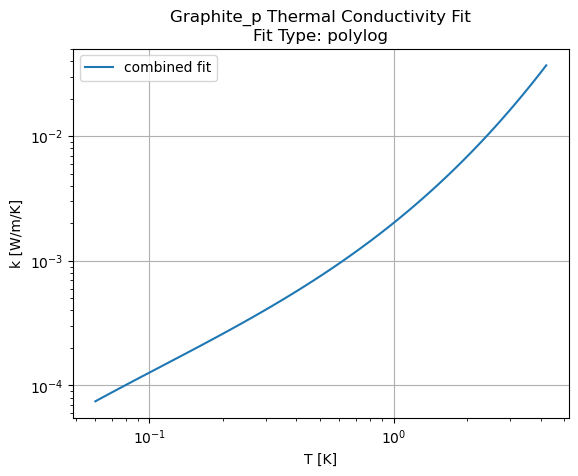

Inconel_718 polylog


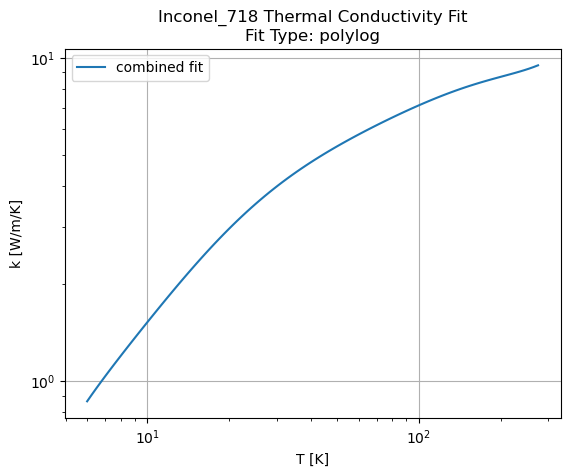

Invar_Fe36Ni polylog


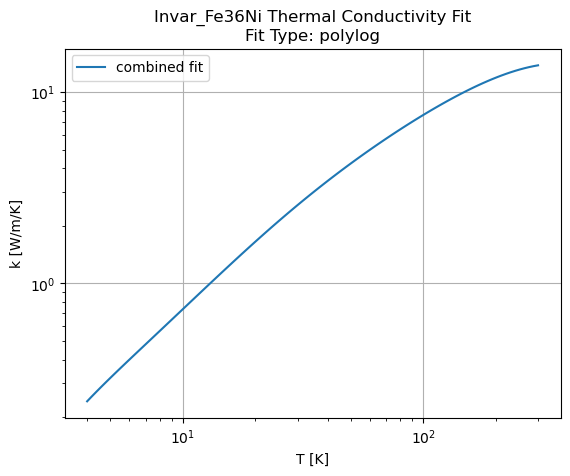

Kapton polylog


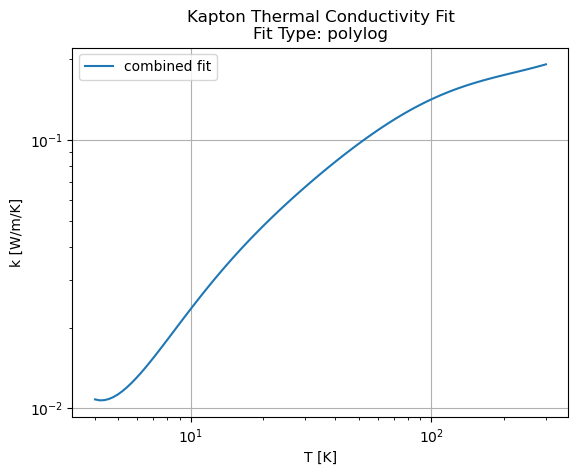

KaptonA polylog


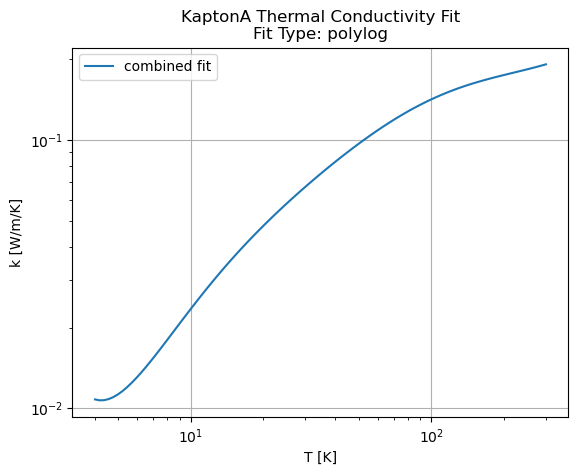

Ketron Nppoly


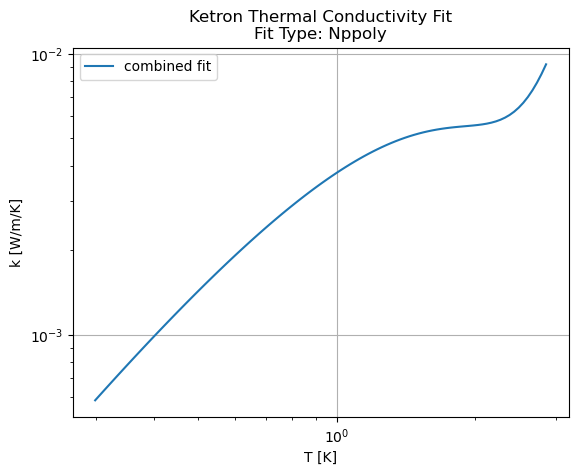

Kevlar49_Composite_Aramid NIST-experf


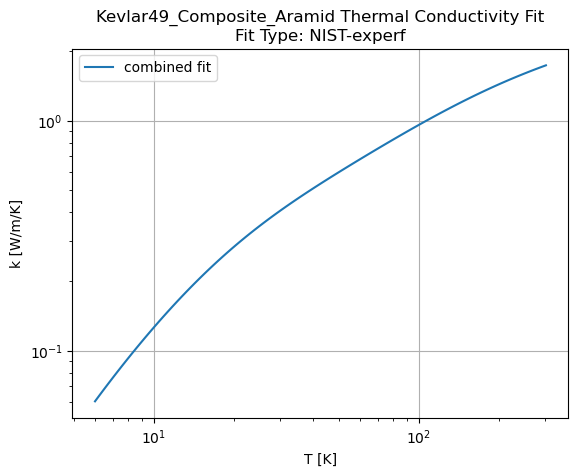

Kevlar49_Fiber_Aramid NIST-experf


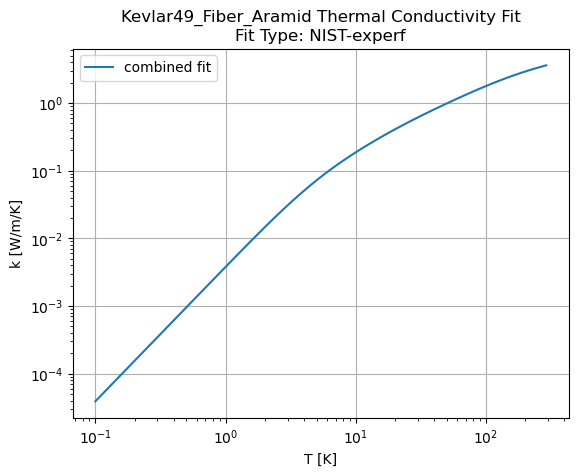

Lead polylog


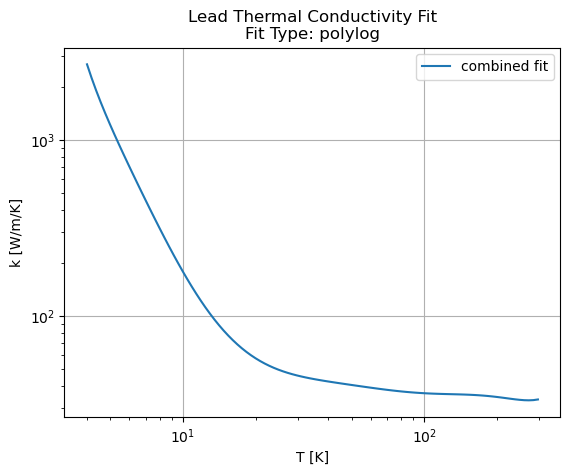

Macor Nppoly


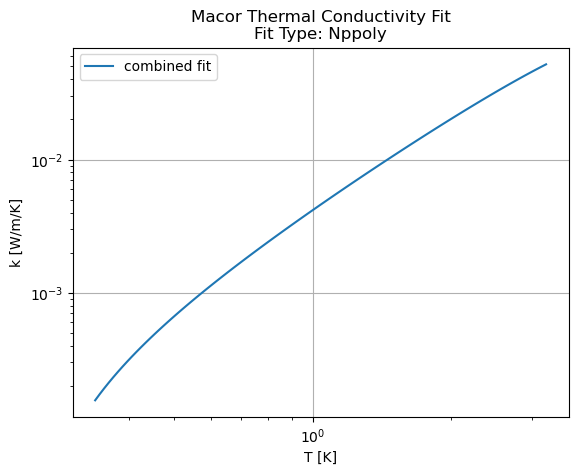

Manganin Nppoly


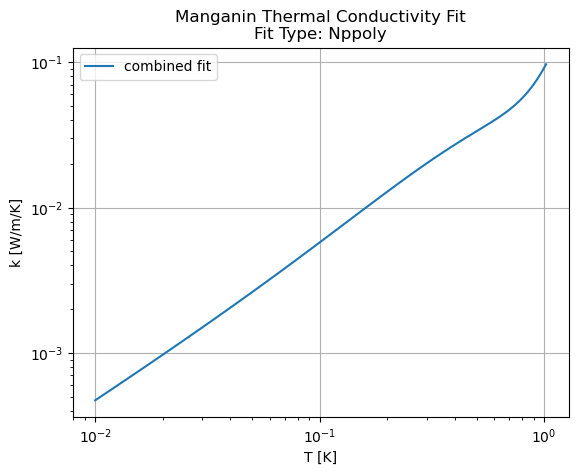

Molybdenum polylog


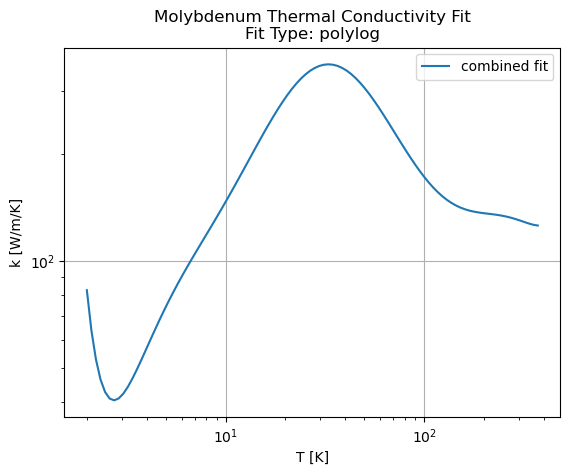

MylarPET polylog


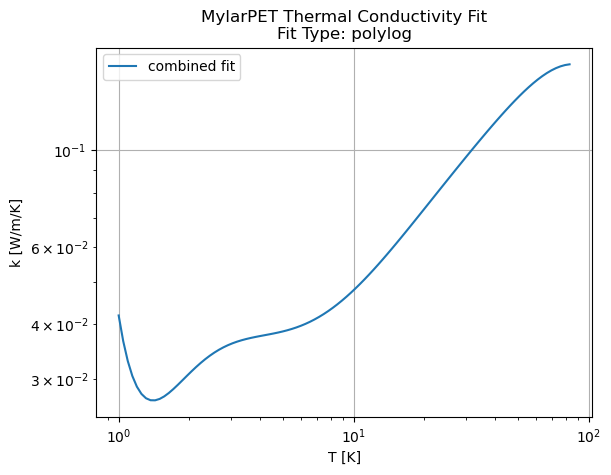

NbTi polylog


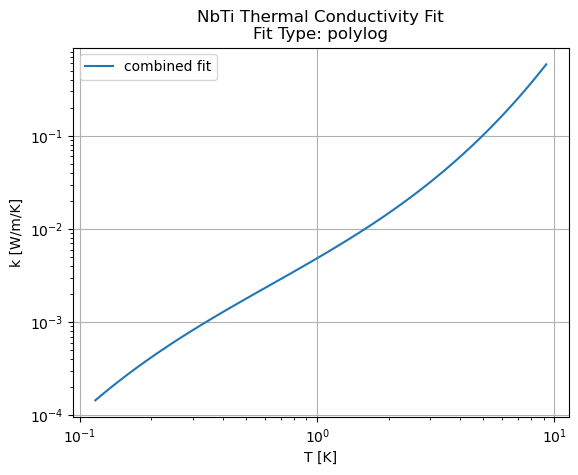

Nichrome polylog


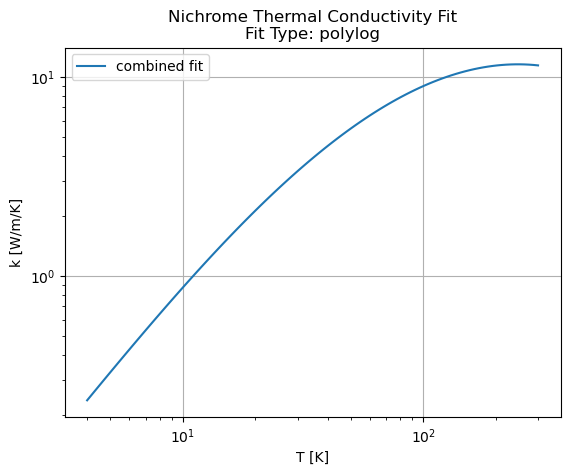

Nickel_Steel_Fe_2.25_Ni polylog


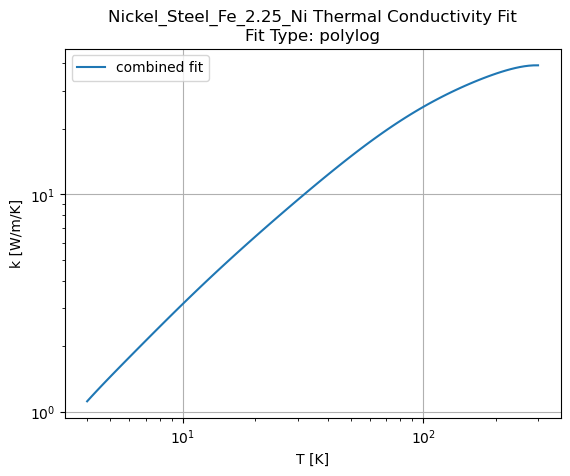

Nickel_Steel_Fe_3.25_Ni polylog


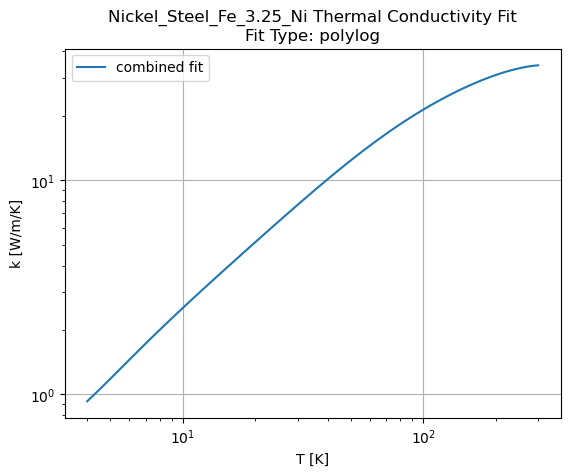

Nickel_Steel_Fe_5.0_Ni polylog


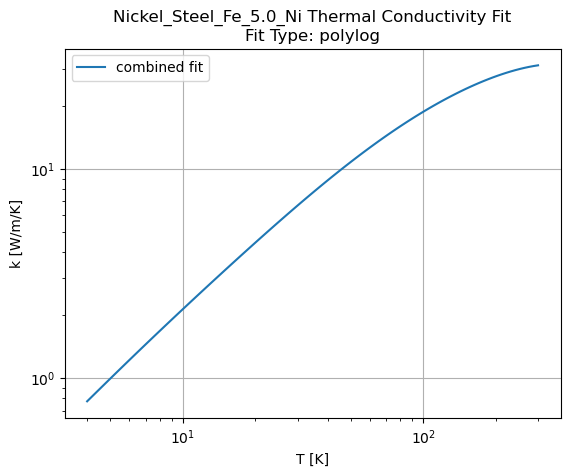

Nickel_Steel_Fe_9.0_Ni polylog


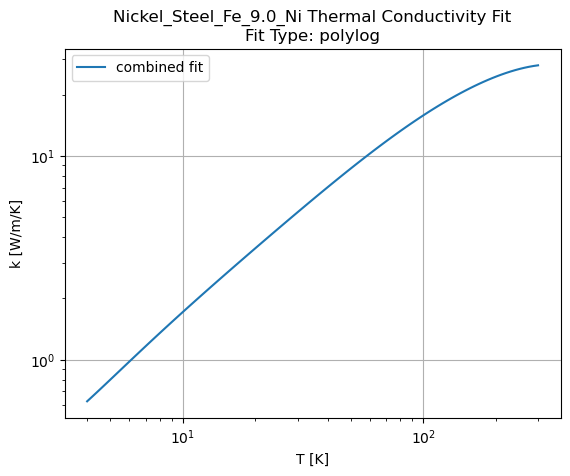

Nylon polylog


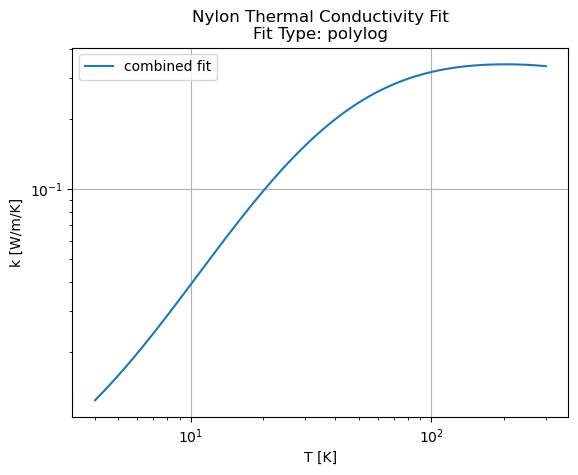

Phosbronze lowTextrapolate


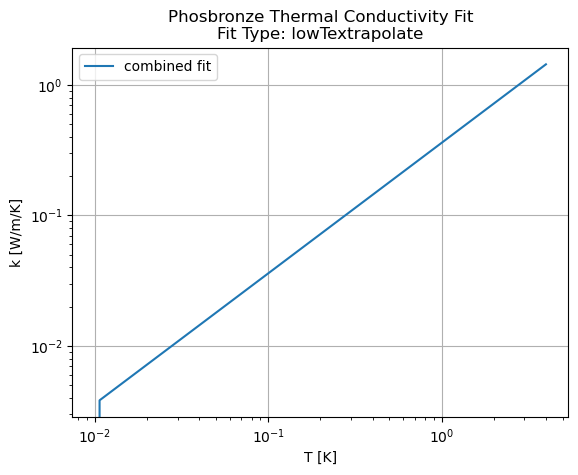

Phosbronze2 lowTextrapolate


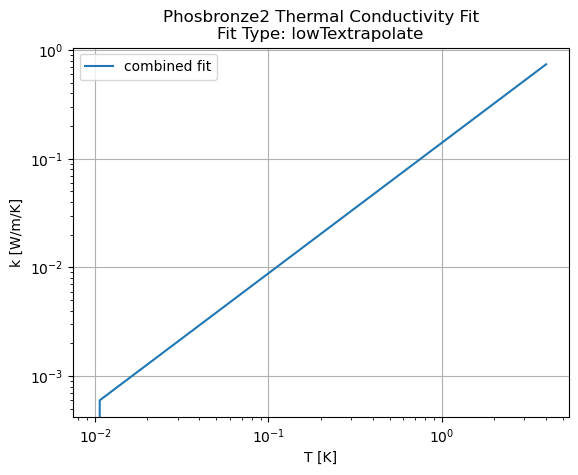

Phosbronze3 lowTextrapolate


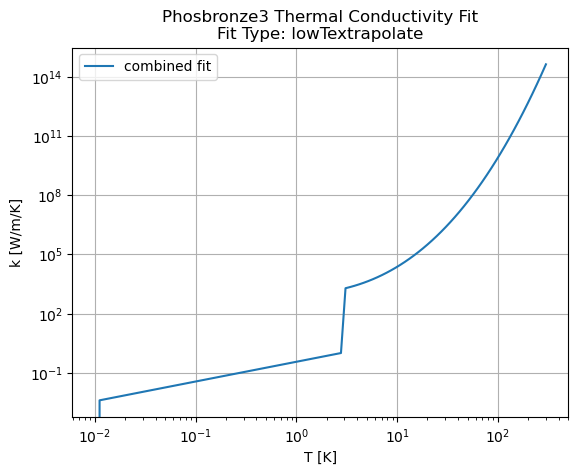

Phosphorbronze polylog


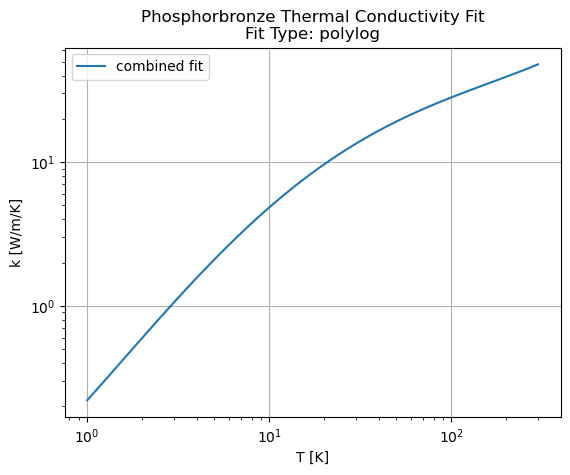

Platinum polylog


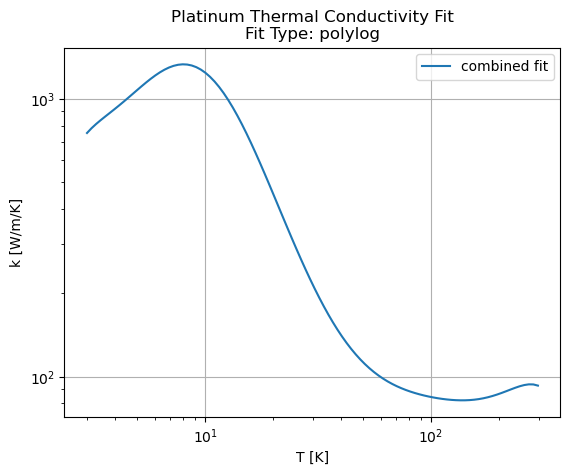

Polystyrene_1.99_lbft3_Freon polylog


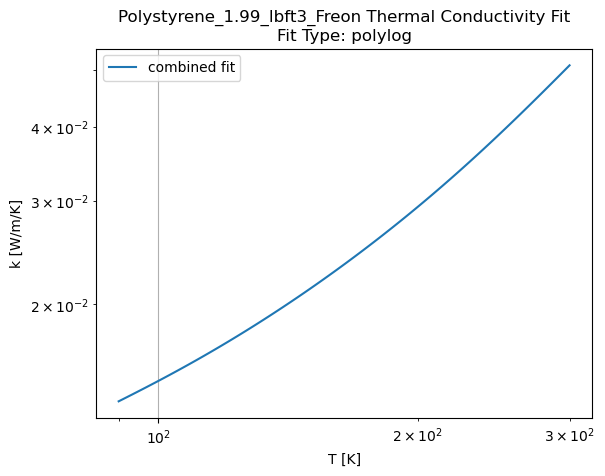

Polystyrene_2.0_lbft3 polylog


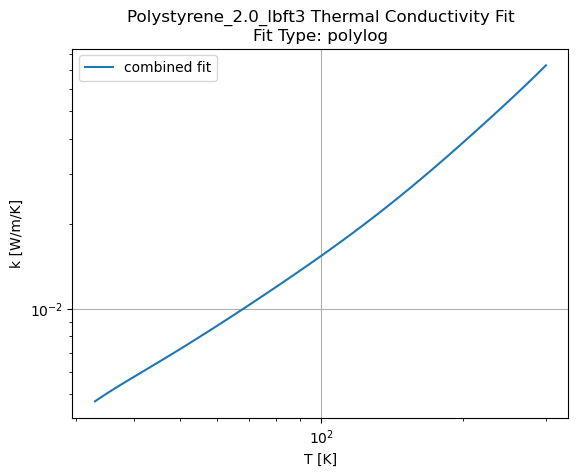

Polystyrene_3.12_lbft3 polylog


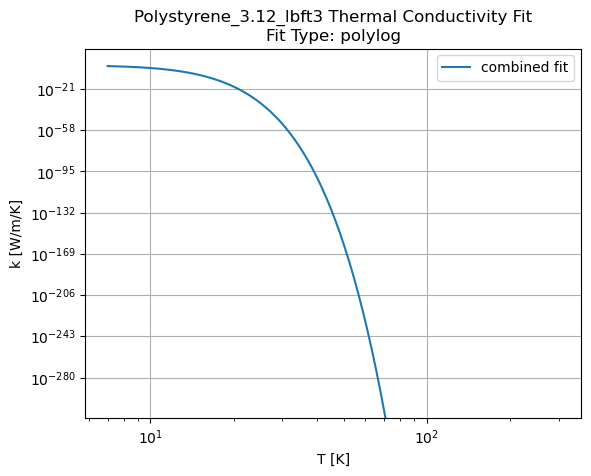

Polystyrene_6.24_lbft3 polylog


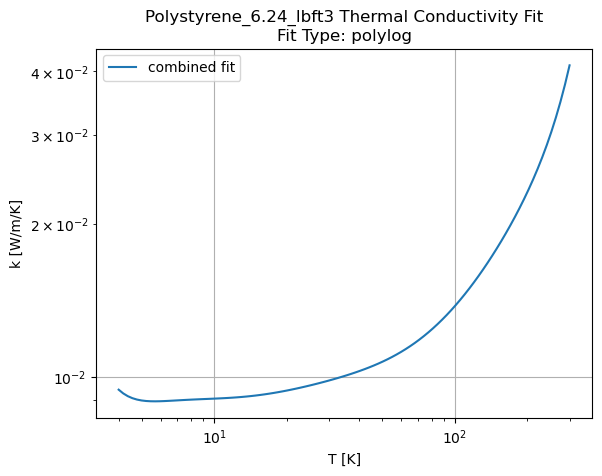

Polyurethane_1.99_lbft3_Freon polylog


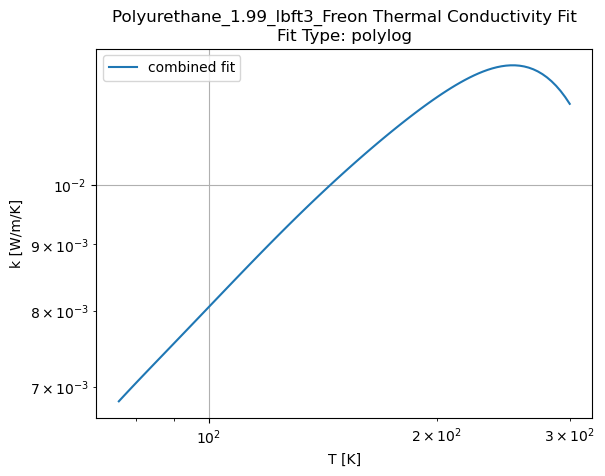

Polyurethane_2.0_lbft3_CO2 polylog


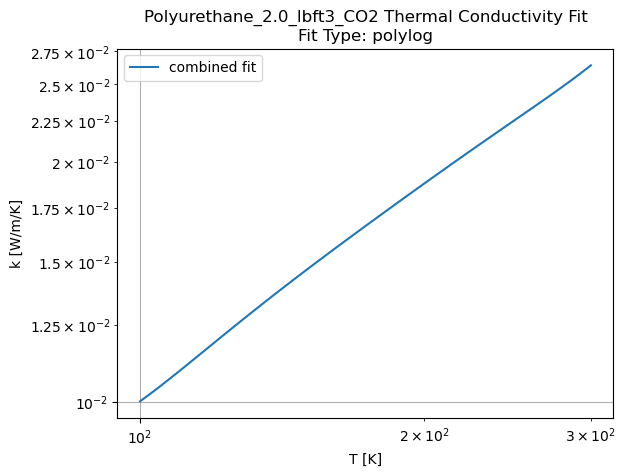

Polyurethane_3.06_lbft3_He polylog


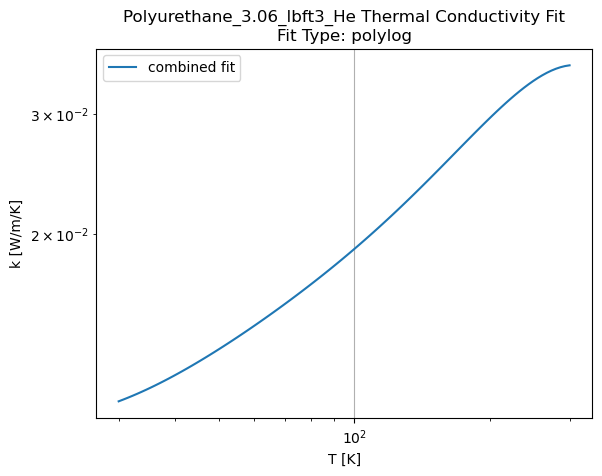

Polyurethane_4.00_lbft3_Freon polylog


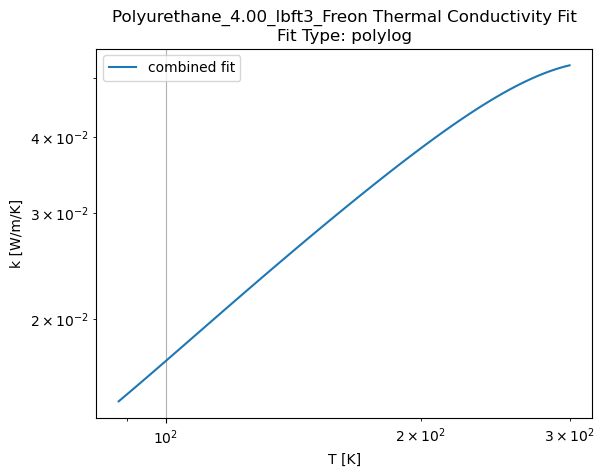

PVC_1.25_lbft3_air polylog


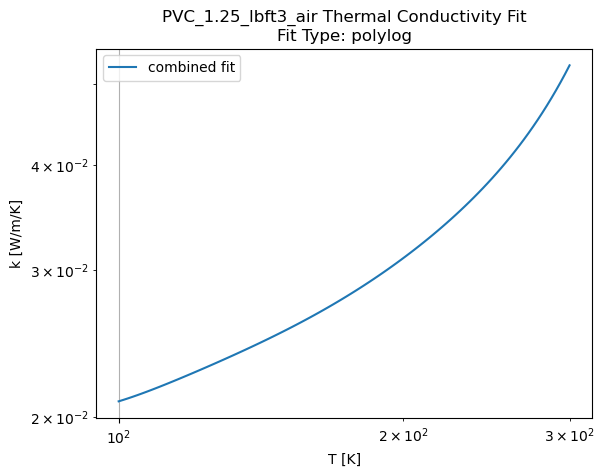

PVC_3.5_lbft3_CO2 polylog


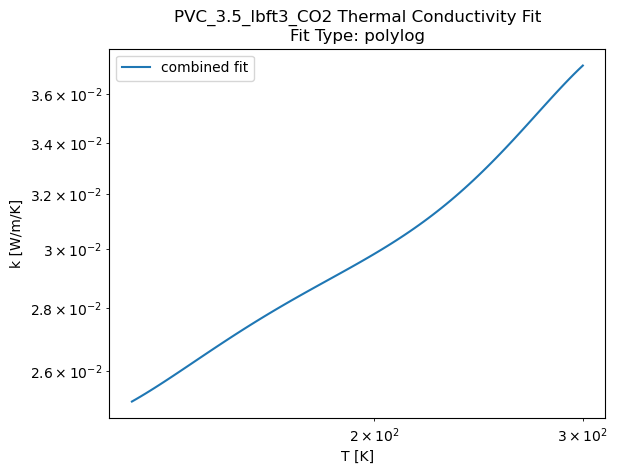

Stainless_Steel comppoly


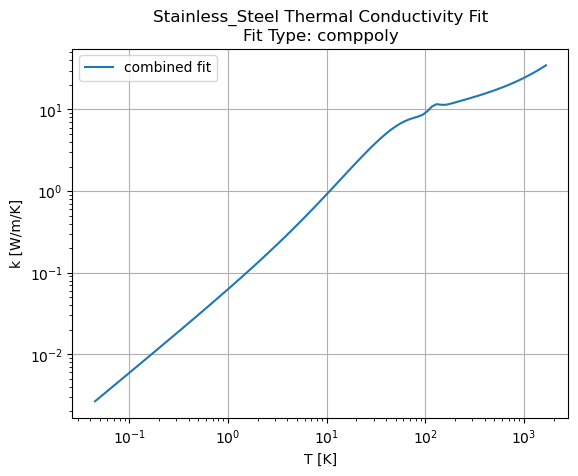

Stainless_Steel_304 comppoly


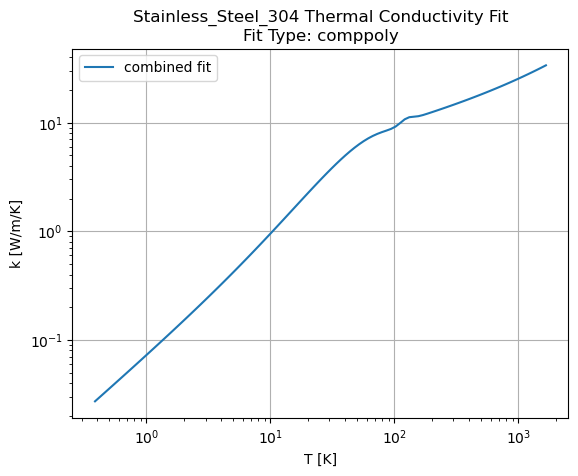

Stainless_Steel_304L polylog


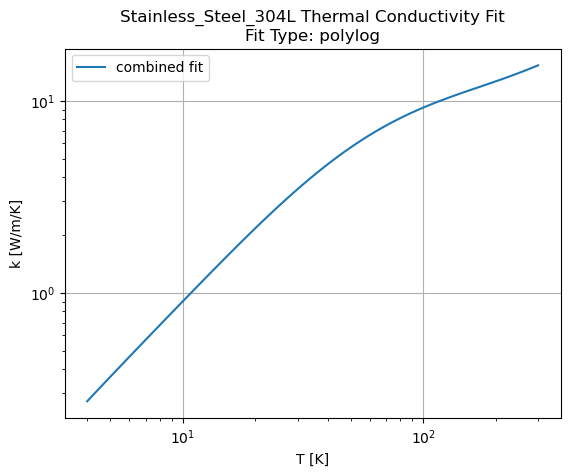

Stainless_Steel_310_lo Nppoly
making path


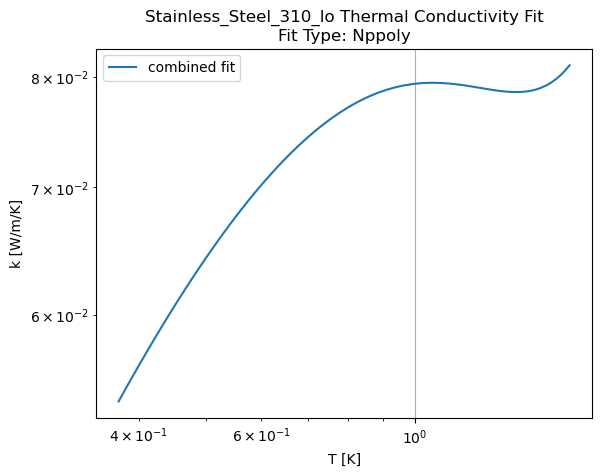

Stainless_Steel_310_hi polylog
making path


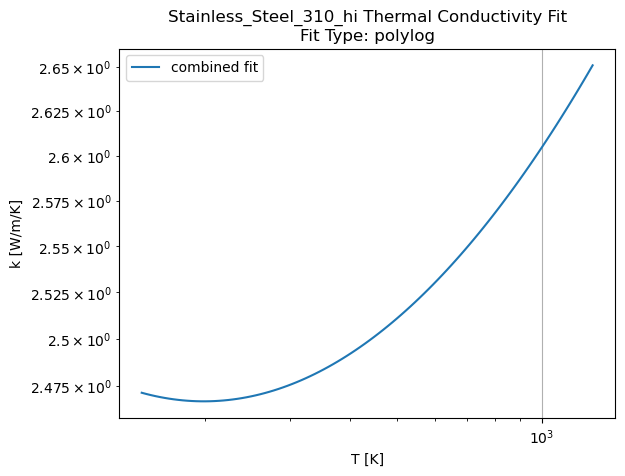

Stainless_Steel_316 comppoly


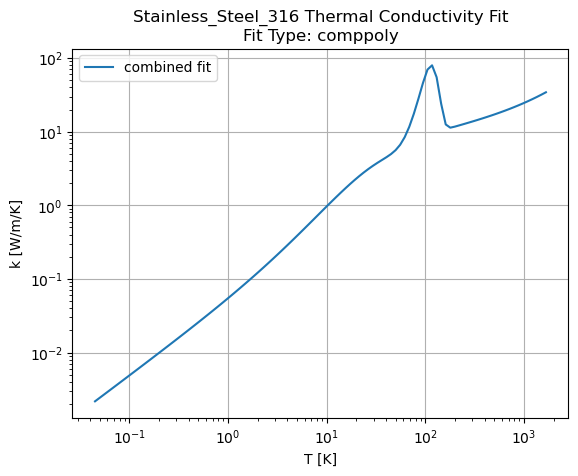

Stainless_Steel_321_lo Nppoly
making path


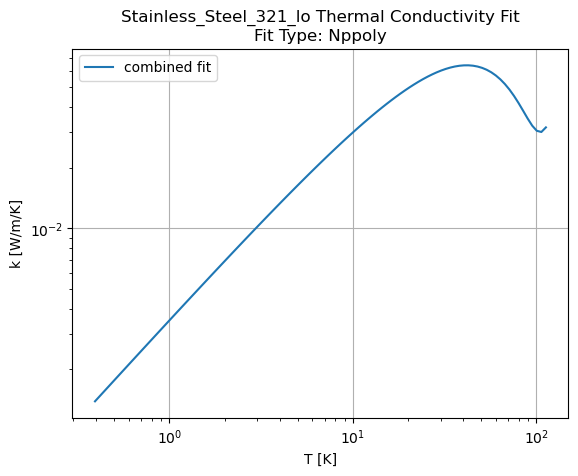

Stainless_Steel_321_hi polylog
making path


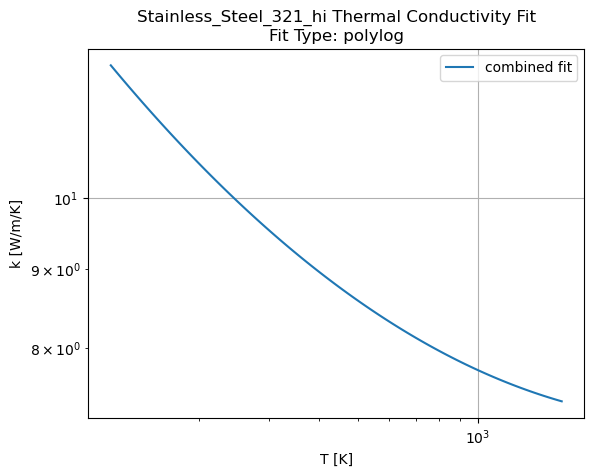

Teflon polylog
making path


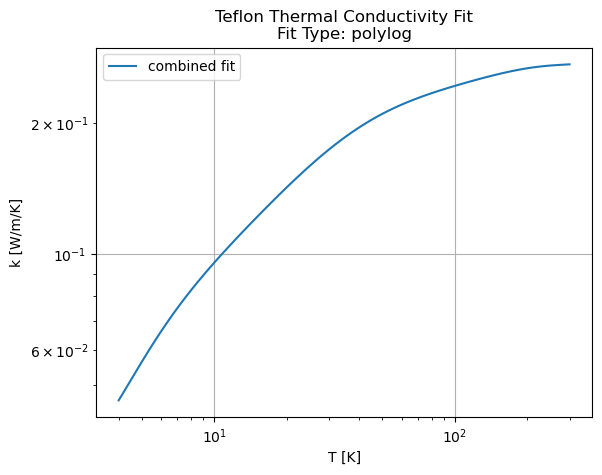

Ti6Al4V polylog


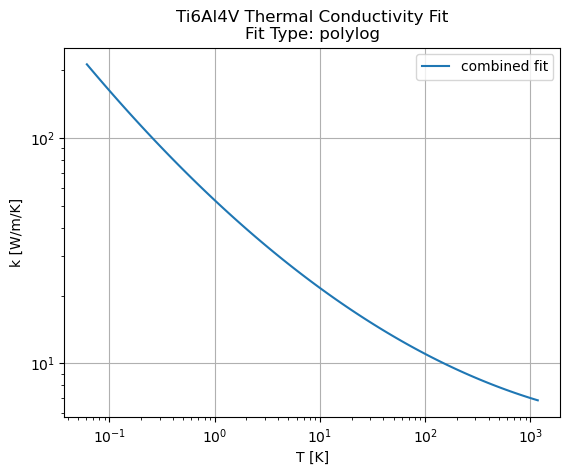

Titanium_15333 polylog
making path


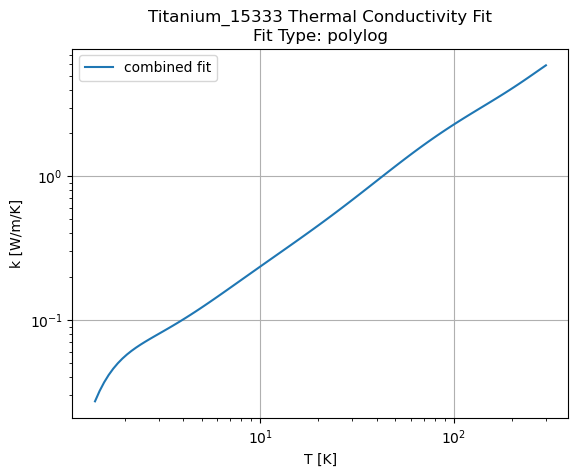

Torlon Nppoly


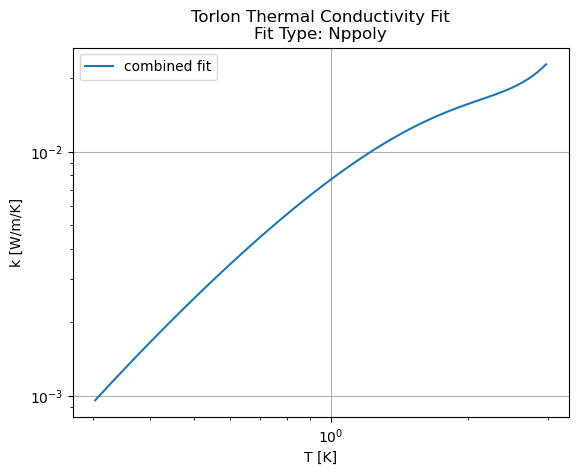

VESPEL Nppoly


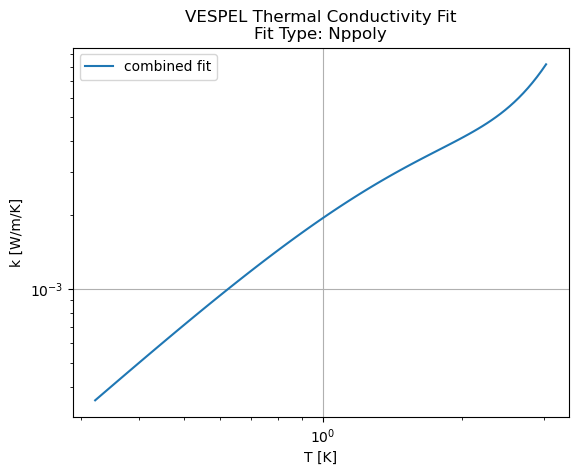

Wood_Balsa_11_lbft3 polylog
making path


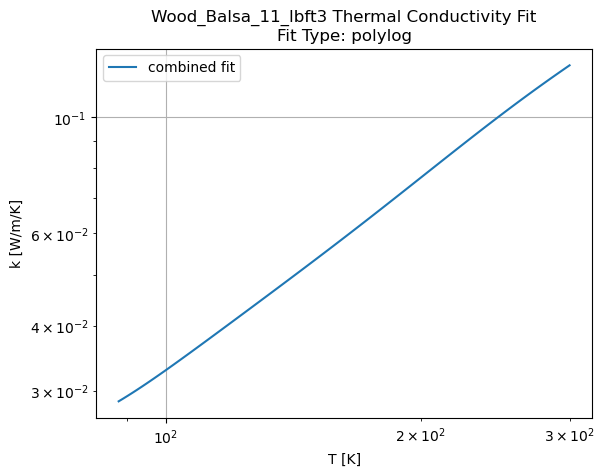

Wood_Balsa_6_lbft3 polylog
making path


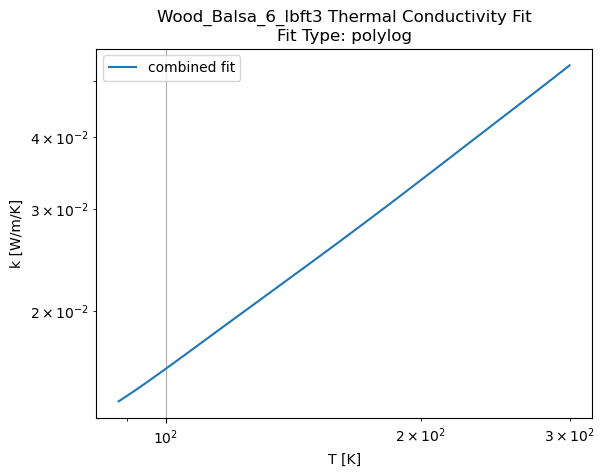

Wood_Beechwood_flatwise polylog
making path


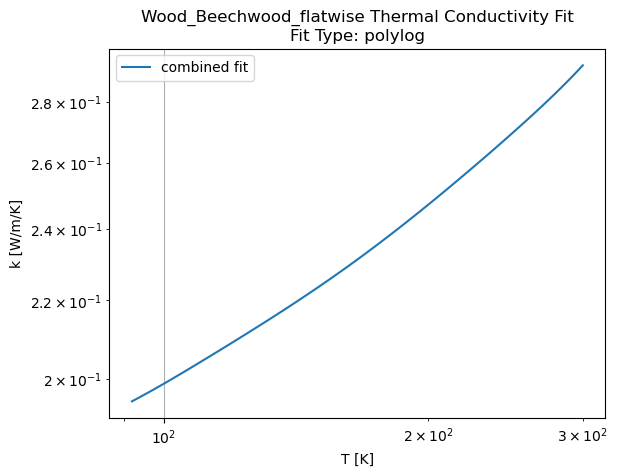

Wood_Beechwood_grain polylog
making path


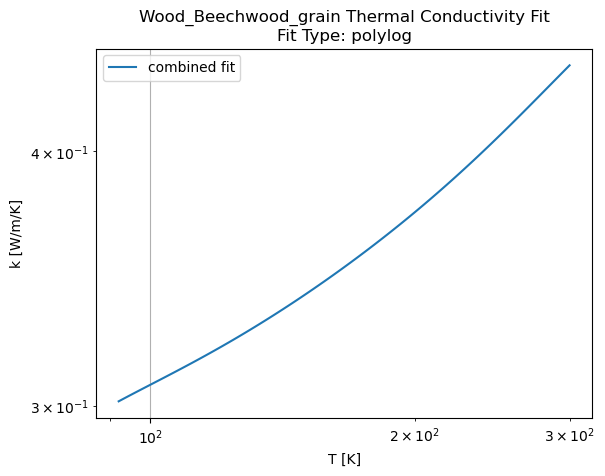

Wood_MapleOak powerlaw
making path


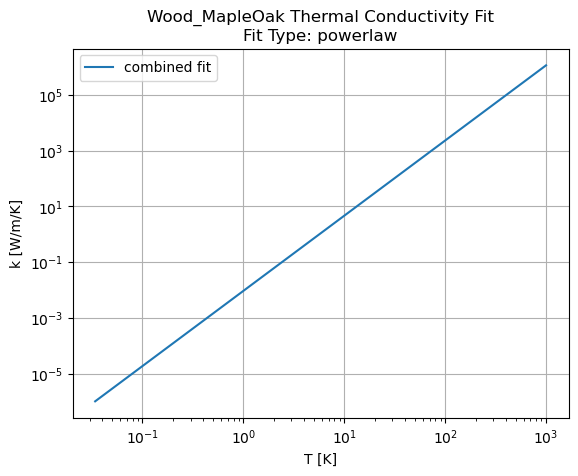

In [9]:
for mat in mat_names[1:]: # ["Graphite"]: # 
    param_dictionary = get_parameters(TCdata, mat)
    T = np.logspace(np.log10(param_dictionary["fit_range"][0]),np.log10(param_dictionary["fit_range"][1]),100)
    print(mat, param_dictionary["fit_type"])

    func = get_func_type(param_dictionary["fit_type"])
    y_pred = func(T, param_dictionary)

    plt.plot(T, y_pred, label='combined fit')
    plt.semilogx()
    plt.semilogy()
    plt.ylabel("k [W/m/K]")
    plt.xlabel("T [K]")
    plt.legend()
    plt.grid(True)
    plt.title(f"{mat} Thermal Conductivity Fit\nFit Type: {param_dictionary['fit_type']}")
    plots_dir = f"{os.path.split(abspath)[0]}{os.sep}lib{os.sep}{mat}{os.sep}plots{os.sep}"
    try:
        if not os.path.exists(plots_dir):
            print("making path")
            os.mkdir(plots_dir)
        plt.savefig(f"{plots_dir}{mat}_fitPlot.pdf", dpi=300)
    except FileNotFoundError:
        pass
    plt.show()